Danish shaikh - 221P054 - 35
Aim - Design a decision tree to predict income
Accuracy: 0.83


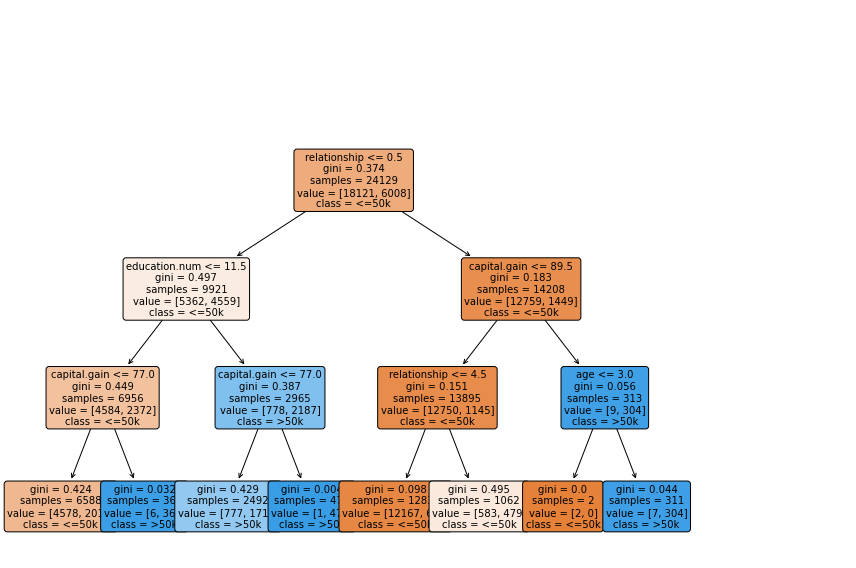

In [6]:
# Required Libraries
print("Danish shaikh - 221P054 - 35")
print("Aim - Design a decision tree to predict income")
import pandas as pd  # For handling datasets
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For plotting
from sklearn.model_selection import train_test_split  # Train-test split
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Decision Tree
from sklearn.preprocessing import LabelEncoder  # Encoding categorical values
from sklearn.metrics import accuracy_score  # Model accuracy
import warnings
warnings.filterwarnings("ignore")  # Suppress warnings

# Load and Clean Data
df = pd.read_csv('adult_dataset.csv')  # Load dataset
df = df.replace('?', np.nan).dropna()  # Replace '?' with NaN and drop missing rows

# Convert all categorical values to numeric using LabelEncoder
df = df.apply(LabelEncoder().fit_transform)

# Split dataset into features (X) and target (y)
X = df.drop('income', axis=1)  # Features (all except 'income')
y = df['income']  # Target variable (income)

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Decision Tree Classifier
model = DecisionTreeClassifier(max_depth=3, random_state=42)  # Limit depth for clarity
model.fit(X_train, y_train)  # Train the model

# Predictions
y_pred = model.predict(X_test)

# Display Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Plot Decision Tree
plt.figure(figsize=(12, 8))
plt.title("Decision Tree Visualization by BE COMPUTER ENGG.", color="purple")
plot_tree(
    model,
    feature_names=X.columns.tolist(),  # Convert column Index to list
    class_names=['<=50k', '>50k'],  # Income classes
    filled=True, rounded=True, fontsize=10
)
plt.tight_layout()
plt.show()

In [7]:
import tkinter as tk  # Tkinter for GUI components
from tkinter import messagebox  # For showing popup messages
import numpy as np  # For handling input as arrays (required for model.predict)

# ⚠️ Ensure that you have already trained your model earlier in the same script
# and that "model" and "X" are available here (from your previous Decision Tree code).

# Function that handles income prediction when the user clicks the button
def predict_income():
    try:
        # Read values from each entry box, convert them to integers
        # (These must be in the same order as model's expected features)
        values = [int(entry.get()) for entry in entries]

        # Convert the list to a 2D NumPy array (since model expects 2D input)
        input_data = np.array(values).reshape(1, -1)

        # Use the pre-trained model to make a prediction
        prediction = model.predict(input_data)

        # Show a message box with the prediction result
        result = "<=50K" if prediction[0] == 0 else ">50K"
        messagebox.showinfo("Prediction Result", f"Predicted Income: {result}")

    except Exception as e:
        # If there's an error (e.g., non-integer input), show an error popup
        messagebox.showerror("Error", f"Invalid input: {e}")

# Feature names (column names), assuming `X` was defined earlier from your dataset
features = X.columns.tolist()  # Excludes 'income' column

# Create the main GUI window
root = tk.Tk()
root.title("Income Prediction GUI")  # Set the window title

entries = []  # This list will store the entry widgets for later use

# Dynamically create input fields for each feature (column)
for i, feature in enumerate(features):
    # Create a label for the feature name
    tk.Label(root, text=feature).grid(row=i, column=0, padx=10, pady=5)

    # Create a text entry field next to the label
    entry = tk.Entry(root)
    entry.grid(row=i, column=1, padx=10, pady=5)

    # Add the entry to our list so we can read values from it later
    entries.append(entry)

# Create the "Predict Income" button
# When clicked, it will call the predict_income() function
tk.Button(root, text="Predict Income", command=predict_income).grid(
    row=len(features), column=0, columnspan=2, pady=20
)

# Start the GUI event loop (this keeps the window open)
root.mainloop()

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  
Accuracy: 100.00%

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.

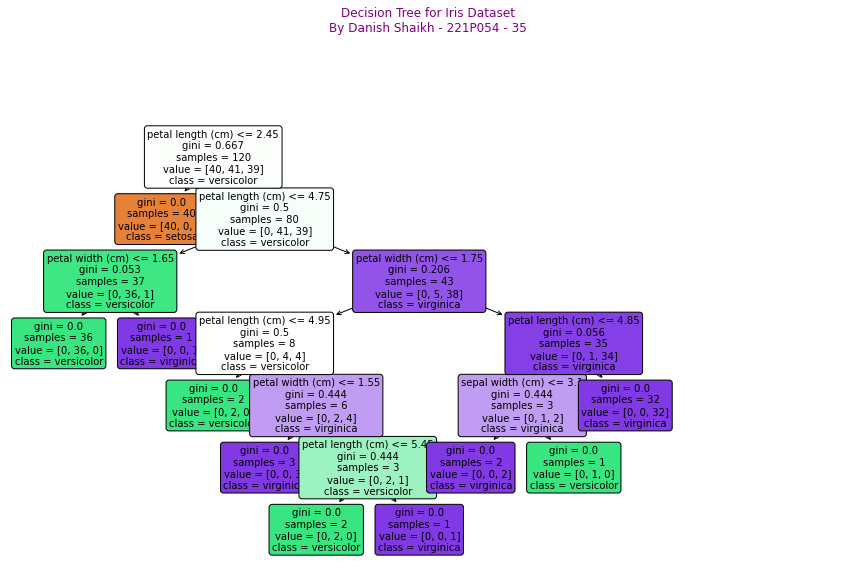


Feature Importances:
sepal length (cm): 0.00
sepal width (cm): 0.02
petal length (cm): 0.91
petal width (cm): 0.08


In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
import matplotlib.pyplot as plt

# 1. Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target  # Features and Labels

# Optional: Convert to DataFrame for better analysis
df = pd.DataFrame(data=np.c_[X, y], columns=iris.feature_names + ['species'])
print(df.head())  # Display first few rows

# 2. Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

# 4. Make predictions
y_pred = clf.predict(X_test)

# 5. Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
print("\nConfusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))

# 6. Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(
    clf,
    filled=True,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree for Iris Dataset\nBy Danish Shaikh - 221P054 - 35", color="purple")
plt.tight_layout()
plt.show()

# 7. Feature Importance
print("\nFeature Importances:")
for name, importance in zip(iris.feature_names, clf.feature_importances_):
    print(f"{name}: {importance:.2f}")
